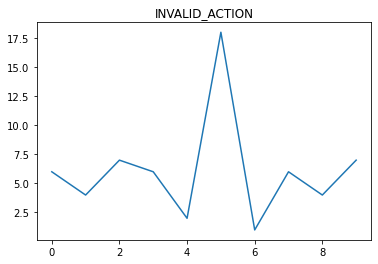

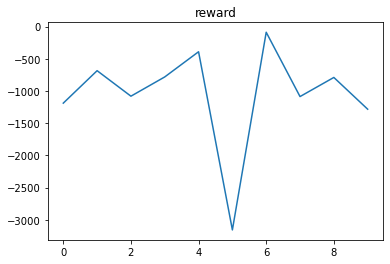

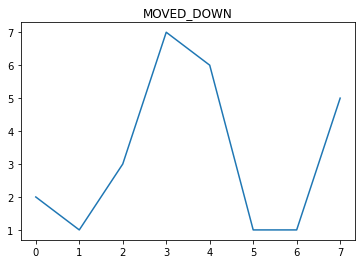

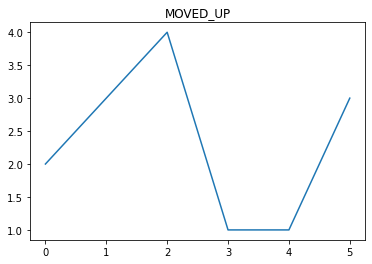

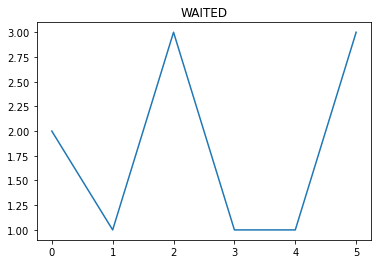

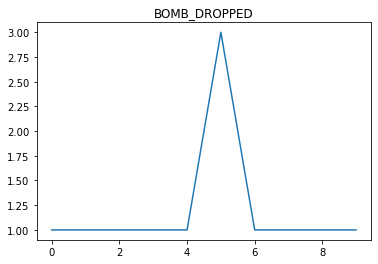

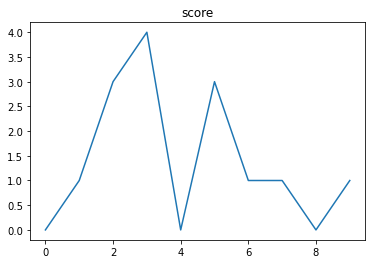

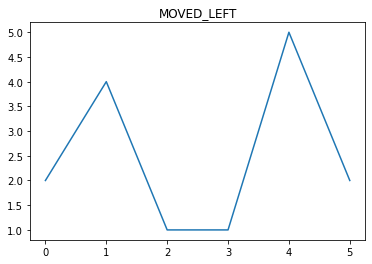

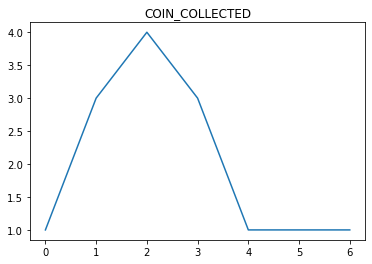

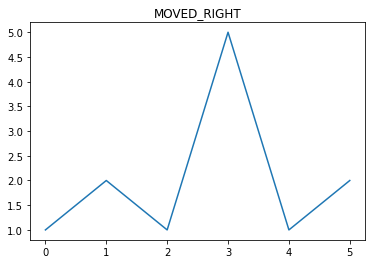

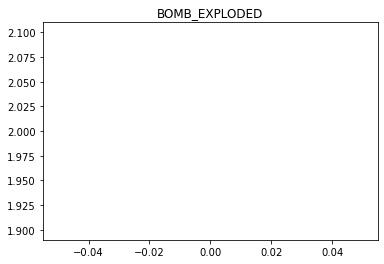

In [5]:
import matplotlib.pyplot as plt
import os
import pickle

folder_path = 'save_files/'

concatenated_dict = {}

# Get a list of file names in the folder and sort them numerically
file_names = [filename for filename in os.listdir(folder_path) if filename.startswith("statistics_") and filename.endswith(".pt")]
file_names.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

# Iterate through the sorted file names
for filename in file_names:
    try:
        # Extract the integer value of x from the filename
        x = int(filename.split('_')[1].split('.')[0])
        
        # Load the pickle file
        with open(os.path.join(folder_path, filename), 'rb') as file:
            data = pickle.load(file)
        
        # Update the concatenated dictionary with the loaded data
        for key, value in data.items():
            if key in concatenated_dict:
                concatenated_dict[key].append(value)
            else:
                concatenated_dict[key] = [value]
    
    except Exception as e:
        print(f"Error processing file {filename}: {str(e)}")



output_filename = 'concatenated_data.pt'

if os.path.exists(output_filename):
    # If the output file already exists, load the existing concatenated dictionary
    with open(output_filename, 'rb') as file:
        existing_data = pickle.load(file)
    
    # Merge the existing data with the new concatenated_dict
    for key, value in concatenated_dict.items():
        if key in existing_data:
            existing_data[key].extend(value)
        else:
            existing_data[key] = value
    
    # Save the updated data back to the output file
    with open(output_filename, 'wb') as file:
        pickle.dump(existing_data, file)
else:
    # If the output file does not exist, save the concatenated_dict as the new output file
    with open(output_filename, 'wb') as file:
        pickle.dump(concatenated_dict, file)

with open('concatenated_data.pt', 'rb') as file:
        existing_data = pickle.load(file)

for key in existing_data.keys():
        plt.figure()
        plt.plot(existing_data[key],)
        plt.title(str(key))
        plt.show()
